In [16]:
# --LifeByte Assingment--

import psycopg2
import pandas as pd
import psycopg2.extras
import datetime
import numpy as np
import matplotlib.pyplot as plt

hostname = 'technical-test-1.cncti7m4kr9f.ap-south-1.rds.amazonaws.com'
database = 'technical_test'
username = 'candidate'
pwd = 'NW337AkNQH76veGc'
port_id = 5432
conn = None



In [17]:
try:
    with psycopg2.connect(
                host = hostname,
                dbname = database,
                user = username,
                password = pwd,
                port = port_id) as conn:

        with conn.cursor(cursor_factory=psycopg2.extras.DictCursor) as cur:


###################################################################################Sql queries for data analysis##########################################################################################################

            df_trades = pd.read_sql_query("SELECT * from trades" , conn)
            df_users = pd.read_sql_query("SELECT * from users", conn)
            df_trade_country = pd.read_sql_query("select a.country_hash,sum(b.volume) as vol, sum(b.contractsize) as total_size,count(b.login_hash) as no_of_users from users as a inner join trades as b on a.login_hash = b.login_hash group by country_hash order by vol desc;", conn)
            df_trade_pairs = pd.read_sql_query("select symbol, sum(volume) as vol from trades group by symbol order by vol desc;", conn)
            df_time_sorted_trades = pd.read_sql_query('select login_hash , open_time from trades order by open_time' , conn)



######################################################################################### Queries from Pg Admin ##########################################################################################################


############################################################## For better readablity,read if from pdf or copy from pdf to pg admin #######################################################################################


            df_count_common_users = pd.read_sql_query('select count(distinct(b.login_hash)) as no_of_common_users, count(b.login_hash) as no_of_common_users_trades from trades as a inner join users as b on a.login_hash = b.login_hash' , conn)
            # tells the count of common users between two tables


            df_user_per_server = pd.read_sql_query('select server_hash, count (login_hash) as no_of_user_per_machine , sum(volume) as vol , sum(contractsize) as cs from trades group by server_hash order by no_of_user_per_machine;' , conn)
            # -- here there are only 3 server which means two thing either date is flawed 
            # -- or a bot is trading in server using all the logins we can take a action based on that
            # -- it can also be an orgnization but thats unlikely based on no. of login per machine and timeframe



            df_server_country = pd.read_sql_query('select a.server_hash as machine, count(distinct(b.country_hash)) as no_of_country from trades as a inner join users as b on a.login_hash = b.login_hash group by a.server_hash' , conn)
            # -- one machine present in many country dosent seem possible they are probably using a vpn too

            df_trading_pairs = pd.read_sql_query('select symbol,sum(contractsize) as total_size, sum(volume) as vol from trades group by symbol order by vol desc;' , conn)
            # -- we can provide make reserves and provide leverage trading for highest vol trading paring to increase our customer attraction and also to increase profit by charging money on leverage 

            df_country_sort = pd.read_sql_query('select a.country_hash,sum(b.volume) as vol,sum(b.contractsize) as total_size,count(b.login_hash) as no_of_users from users as a inner join trades as b on a.login_hash = b.login_hash group by country_hash order by vol;' , conn)
            # -- we can see country with least volume and maybe less focus on that part because its not working there and we can focus more on avg performing country to increase our trade volume 

            df_disabled_users = pd.read_sql_query('select a.login_hash ,sum(a.enable) as enabled, count(b.login_hash) as no_of_trades,sum(b.volume) as vol from users as a inner join trades as b on a.login_hash = b.login_hash where enable=0 group by a.login_hash order by vol desc;' , conn)
            # --users who used to trade but are now disabled we can targate high volume trading users and convince them to join the platform again or ask them the problem and fix it
            # --did using view in pg admin


            df_buy_sell_vol = pd.read_sql_query('select cmd , sum(volume) as vol,count(login_hash) as no_of_orders from trades group by cmd' , conn)
            # --total volume an no_of_orders in buy and sell

            df_count_enable_disable = pd.read_sql_query('select count(distinct(login_hash)) , a.enable from users as a group by a.enable' , conn)
            # --total number of enaled and disabled users

            df_user_per_curruncy = pd.read_sql_query('select count(distinct(login_hash)) , currency from users group by currency' , conn)
            # --number of users using per type of curruncy





except Exception as error:
    print(error)


c:\Users\piyus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\piyus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\piyus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\piyus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas

In [18]:
# print(df_users.isnull().sum())
print(df_trades.isnull().sum())
# 7 contract size have null value this is another error in data we can just drop these rows as its only 7

login_hash      0
ticket_hash     0
server_hash     0
symbol          0
digits          0
cmd             0
volume          0
open_time       0
open_price      0
close_time      0
contractsize    7
dtype: int64


In [19]:
for i in range(10000):
    if df_trades.loc[i,'open_time'] > df_trades.loc[i, 'close_time']:
        print(i)

#checking for one more potential error that closing time is not before closing time 
#cuase it was mentiond the data was flawed so trying to find more error besides the server_hash one

<AxesSubplot:xlabel='country_hash'>

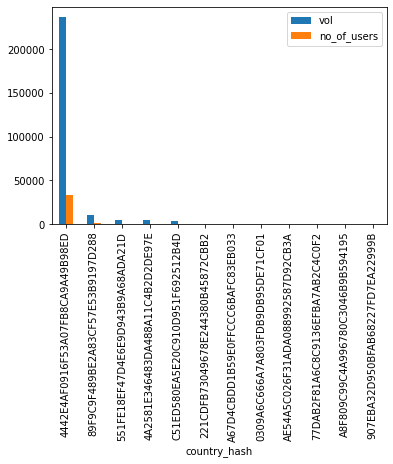

In [20]:
df_trade_country.plot.bar(x='country_hash' , y=['vol', 'no_of_users'] , rot=90)

majority of trades are comming from one country only 
there is also server issue so we have to look more into that

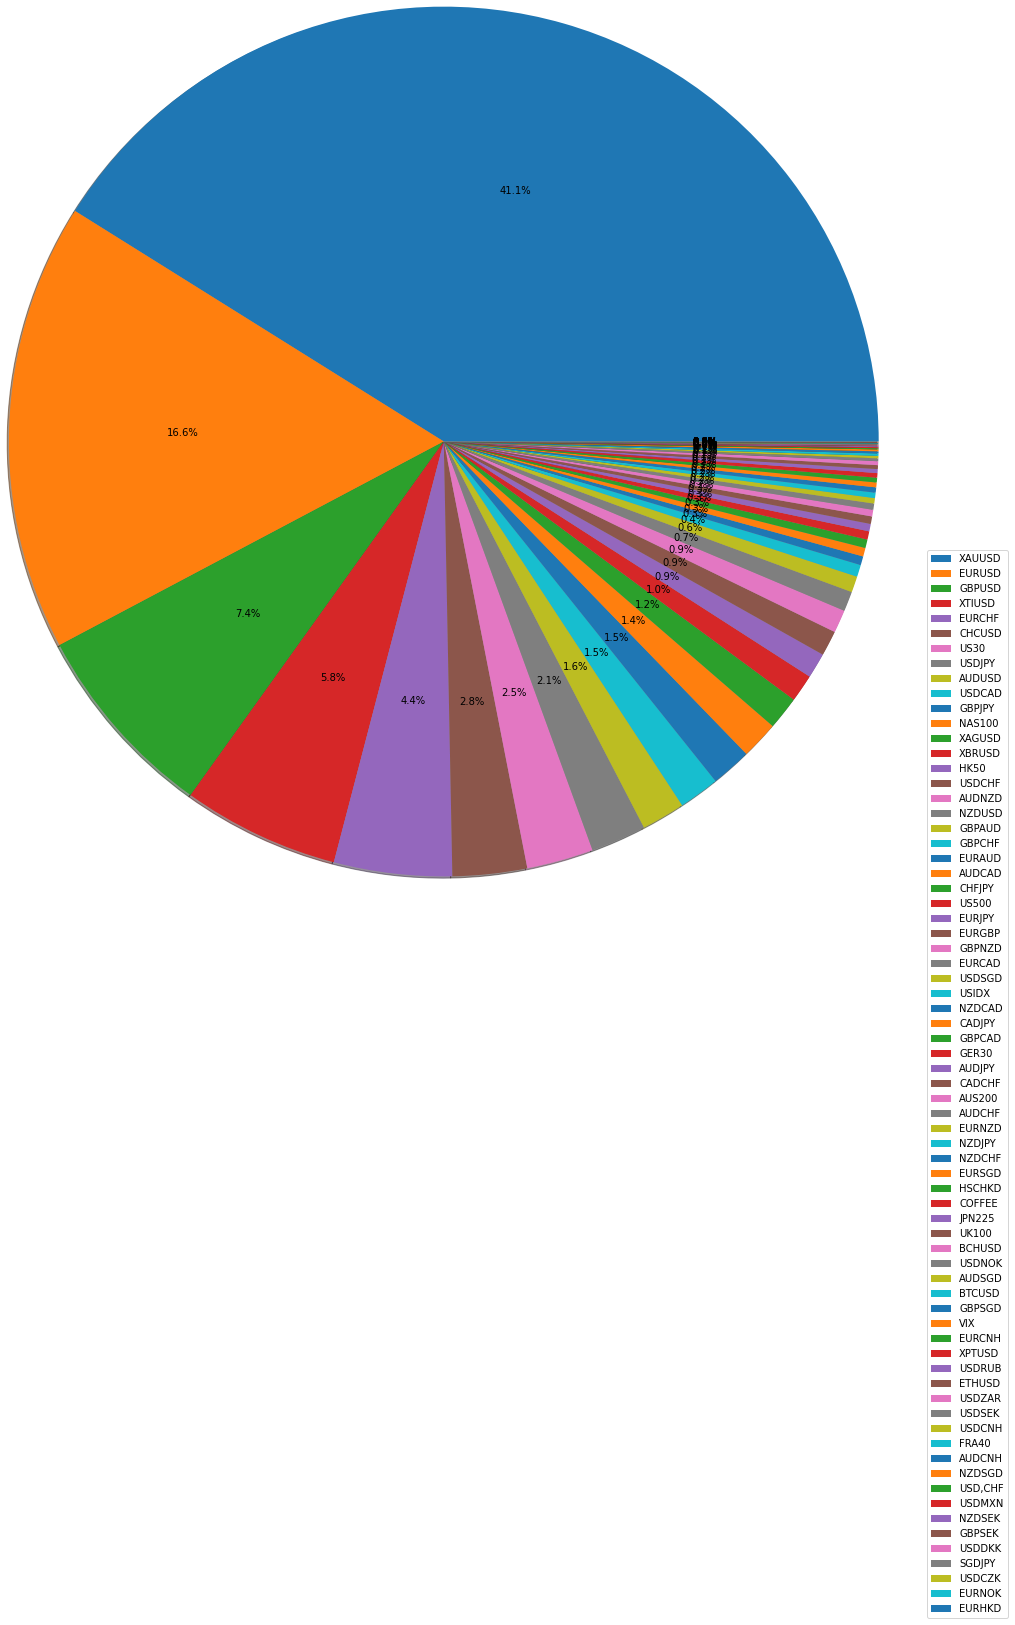

In [21]:

vol = df_trade_pairs['vol'].to_numpy()
index= df_trade_pairs['symbol'].to_numpy()



plt.pie(vol,autopct='%1.1f%%',shadow=True, radius=5)
plt.legend(index , bbox_to_anchor=(2.7,.025))
plt.show() 


# volume traded per trade paie



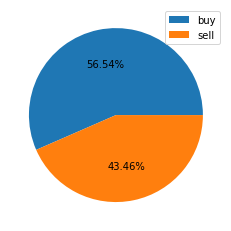

In [23]:
vol = df_buy_sell_vol['vol'].to_numpy()
index= ['buy', 'sell']

plt.pie(vol,autopct='%1.2f%%', radius=1)
plt.legend(index)

In [24]:
# To close the connection after you are done
if conn is not None:
    conn.close()